<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls '/content/drive/My Drive/Colab Notebooks'
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')

Mounted at /content/drive
 best_model			  my_submission.csv
 best_model1			  my_submission.gsheet
 best_model2			  submission.csv
 catboost_info			  test.csv
 cat.ipynb			 'train (1).csv'
'ensemble 1.ipynb'		  train.csv
'ensemble 2.ipynb'		 'Training examples.csv'
'[homework]linear_models.ipynb'  'Копия блокнота "baseline.ipynb".ipynb'
'my_submission (1).gsheet'


In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [7]:
data=data.replace(" ", np.nan)
data.isna().sum(axis=0)#Количество Nan в столбцах

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [9]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   object 
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

In [10]:
data["TotalSpent"]=data["TotalSpent"].values.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

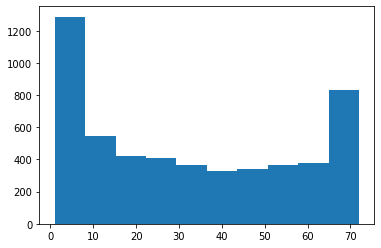

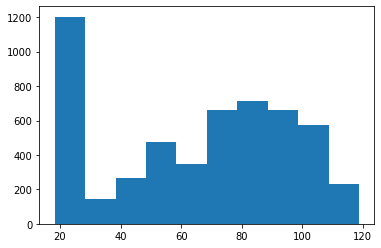

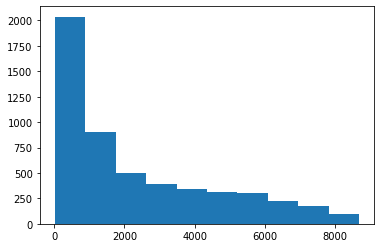

In [11]:
plt.hist(data[num_cols].values.T[0])
plt.show()
plt.hist(data[num_cols].values.T[1])
plt.show()
plt.hist(data[num_cols].values.T[2])
plt.show()

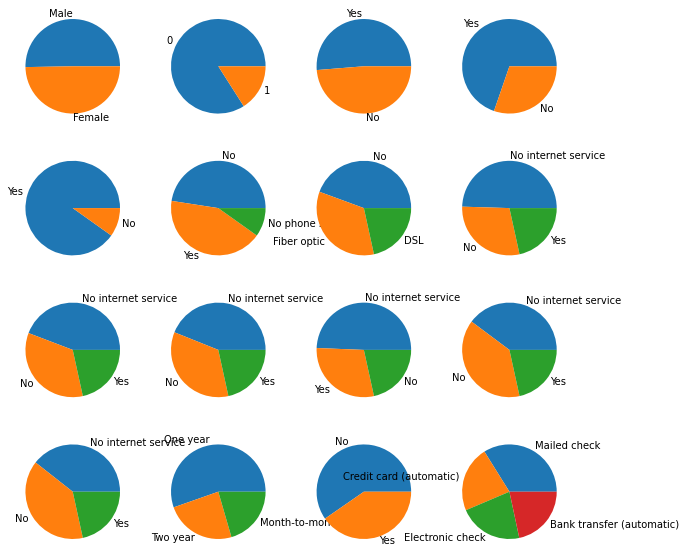

In [12]:
fig, ax = plt.subplots(4, 4, figsize=(10,10))
i=0
ax = ax.ravel()
for col in cat_cols:
    ax[i].pie(data[col].value_counts(), labels=data[col].unique())
    i+=1
fig.show()

In [13]:
data[target_col].value_counts()
# Данные не сбалансированы

0    3889
1    1384
Name: Churn, dtype: int64

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [27]:
numeric_data=data[num_cols]
categorical_data=data[cat_cols]
dummy_features=pd.get_dummies(categorical_data)
X=pd.concat([numeric_data, dummy_features], axis=1)
y=data[target_col].values

train_x, test_x, train_y, test_y=train_test_split(X,y)
scaler=StandardScaler()
scaler.fit_transform(train_x[:3])
scaler.transform(test_x[:3])


array([[-0.4224695 ,  2.40251022,  2.10120534,  0.        ,  1.41421356,
        -1.41421356, -1.        ,  1.        , -1.41421356,  1.41421356,
         0.        ,  0.        , -1.41421356,  0.        ,  1.41421356,
         0.        ,  1.41421356, -1.41421356,  1.41421356, -1.41421356,
         0.        ,  1.41421356, -1.41421356,  0.        ,  1.41421356,
        -1.41421356,  0.        , -0.70710678, -1.41421356,  1.        ,
        -0.70710678, -1.41421356,  1.        ,  1.41421356, -1.41421356,
         0.        ,  0.70710678, -0.70710678,  0.        , -0.70710678,
         0.70710678, -0.70710678, -0.70710678,  1.41421356,  0.        ],
       [ 0.97605022,  0.2684369 ,  3.9329091 ,  0.        ,  1.41421356,
        -1.41421356, -1.        ,  1.        ,  0.70710678, -0.70710678,
         1.        , -1.        , -1.41421356,  1.        , -0.70710678,
         1.        , -0.70710678, -1.41421356,  1.41421356, -1.41421356,
         0.        ,  1.41421356, -1.41421356,  0.

In [19]:
model=LogisticRegressionCV(scoring='roc_auc', refit=True)
model.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True,
                     scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=0)

In [20]:
pred=model.predict(train_x)
print(roc_auc_score(pred,train_y))
pred=model.predict(test_x)
print(roc_auc_score(pred,test_y))

0.7514895775687142
0.7570728720146969


Выпишите какое лучшее качество и с какими параметрами вам удалось получить


train_roc_auc=0.7514895775687142

test_roc_suc= 0.7570728720146969

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True,
                     scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=0)

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [21]:
X=pd.concat([data[num_cols], data[cat_cols]],axis=1)
y=data[target_col].values
cat_train_x, cat_test_x, cat_train_y, cat_test_y=train_test_split(X,y, test_size=0.05)

In [22]:
!pip install catboost
from catboost import CatBoostClassifier
cat=CatBoostClassifier(cat_features=cat_cols, iterations=800, learning_rate=0.1, depth=10, l2_leaf_reg=30,eval_metric='AUC')
cat.fit(cat_train_x,cat_train_y)
roc_auc_score(cat.predict(cat_train_x),cat_train_y)

     |████████████████████████████████| 65.7MB 97kB/s 
0:	total: 113ms	remaining: 1m 30s
1:	total: 130ms	remaining: 51.8s
2:	total: 150ms	remaining: 39.8s
3:	total: 157ms	remaining: 31.3s
4:	total: 186ms	remaining: 29.6s
5:	total: 207ms	remaining: 27.4s
6:	total: 216ms	remaining: 24.5s
7:	total: 244ms	remaining: 24.1s
8:	total: 253ms	remaining: 22.2s
9:	total: 326ms	remaining: 25.8s
10:	total: 338ms	remaining: 24.3s
11:	total: 370ms	remaining: 24.3s
12:	total: 431ms	remaining: 26.1s
13:	total: 487ms	remaining: 27.4s
14:	total: 559ms	remaining: 29.3s
15:	total: 564ms	remaining: 27.6s
16:	total: 623ms	remaining: 28.7s
17:	total: 682ms	remaining: 29.6s
18:	total: 686ms	remaining: 28.2s
19:	total: 750ms	remaining: 29.2s
20:	total: 813ms	remaining: 30.2s
21:	total: 829ms	remaining: 29.3s
22:	total: 842ms	remaining: 28.4s
23:	total: 907ms	remaining: 29.3s
24:	total: 975ms	remaining: 30.2s
25:	total: 1.04s	remaining: 31s
26:	total: 1.11s	remaining: 31.9s
27:	total: 1.17s	remaining: 32.3s
28:	

0.8737508601195891

In [23]:
roc_auc_score(cat.predict(cat_test_x),cat_test_y)

0.7829328914664457

In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import csv

In [28]:
inputs = keras.Input(shape=(45,))
x = layers.Dense(20, activation="relu")(inputs)
x = layers.Dense(10, activation="relu")(x)
x = layers.Dense(8, activation="relu")(x)
x = layers.Dense(6, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss=keras.losses.binary_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=["AUC"])
model.fit(train_x, train_y, epochs=1000, batch_size=10000)

Epoch 1/1000
1/1 [==============================] - 1s 626ms/step - loss: 476.0476 - auc: 0.4932
Epoch 2/1000
1/1 [==============================] - 0s 17ms/step - loss: 443.1278 - auc: 0.4925
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 409.1139 - auc: 0.4920
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 374.6948 - auc: 0.4916
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 340.0036 - auc: 0.4919
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 305.1089 - auc: 0.4921
Epoch 7/1000
1/1 [==============================] - 0s 14ms/step - loss: 270.0397 - auc: 0.4913
Epoch 8/1000
1/1 [==============================] - 0s 14ms/step - loss: 234.8165 - auc: 0.4909
Epoch 9/1000
1/1 [==============================] - 0s 15ms/step - loss: 199.4780 - auc: 0.4907
Epoch 10/1000
1/1 [==============================] - 0s 17ms/step - loss: 164.1582 - auc: 0.4884
Epoch 11/1000
1/1 [===================

In [29]:
pred=model.predict(test_x)
roc_auc_score(test_y, pred.T[0])

0.8415863704063954

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [30]:
best_model = model# какая-то предыдущая модель

In [32]:
X_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')
submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/submission.csv')
X_test=X_test.replace(" ", np.nan)
X_test.isna().sum(axis=0)
X_test["TotalSpent"]=X_test["TotalSpent"].values.astype(float)
numeric_data=X_test[num_cols]
categorical_data=X_test[cat_cols]
dummy_features=pd.get_dummies(categorical_data)
X=pd.concat([numeric_data, dummy_features], axis=1)
scaler.transform(X[:3])

#submission['Churn'] = best_model.predict_proba(X_test)[:,1] / best_model.predict(X_test)
submission['Churn']=best_model.predict(X)
submission.to_csv('/content/drive/My Drive/Colab Notebooks/my_submission.csv')
#X.info()

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.